# Visualising MLP Data Transformation
> I was trying to explain how a neural learns to perform certain tasks by performing a series of transformations so decided to put a little notebook together to visualise this process.

- toc:true
- branch: master
- badges: true
- comments: true
- author: Omar Jamil
- categories: [Neural Network, jupyter]

In [1]:
from sklearn.datasets import make_moons, make_circles
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

## Training data
Sample data of cocentric circles. scikit has a fair few such datasets. This is going to be a classification problem so the points will belong to either class 1 or class 2 here so y vector contains 0s and 1s to signify which class the data belong to.

In [2]:
X,y = make_circles(n_samples=100000, noise=0.2, factor=0.5, random_state=1)

## Visualise the training data

In [3]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

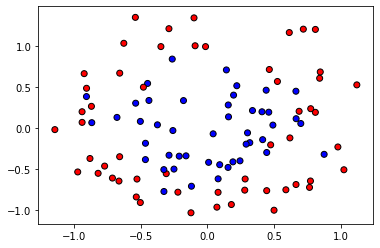

In [4]:
ax = plt.subplot()
ax.scatter(X[:100, 0], X[:100, 1], c=y[:100], cmap=cm_bright,edgecolors='k')

## Neural Network

In [5]:
import tensorflow as tf
from tensorflow import keras

Use Tensorflow sequentail API to build the neural network. It is worth experimenting here and working out what is the minimum number of dimensions required in the hidden layer to be able to separate these data. I have added an extra linear layer with 2 nodes to visualise how the input datapoints have been transformed. This extra layer does not really have any impact on the neural network performance.  

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(2))
model.add(keras.layers.Dense(6,activation="relu"))
model.add(keras.layers.Dense(2,activation="linear"))
model.add(keras.layers.Dense(1,activation="sigmoid"))

Compile the model using binary cross entropy loss because it is a two class problem.

In [14]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.BinaryAccuracy()],
)

In [15]:
print("Fit model on training data")
history = model.fit(
    X,
    y,
    batch_size=32,
    epochs=5,
    validation_split=0.2,
)

Fit model on training data
Epoch 1/5
2500/2500 [==============================] - 3s 1ms/step - loss: 0.4813 - binary_accuracy: 0.7551 - val_loss: 0.2862 - val_binary_accuracy: 0.8785
Epoch 2/5
2500/2500 [==============================] - 3s 1ms/step - loss: 0.2676 - binary_accuracy: 0.8877 - val_loss: 0.2657 - val_binary_accuracy: 0.8853
Epoch 3/5
2500/2500 [==============================] - 2s 952us/step - loss: 0.2619 - binary_accuracy: 0.8890 - val_loss: 0.2646 - val_binary_accuracy: 0.8877
Epoch 4/5
2500/2500 [==============================] - 2s 952us/step - loss: 0.2613 - binary_accuracy: 0.8889 - val_loss: 0.2645 - val_binary_accuracy: 0.8870
Epoch 5/5
2500/2500 [==============================] - 2s 947us/step - loss: 0.2611 - binary_accuracy: 0.8899 - val_loss: 0.2672 - val_binary_accuracy: 0.8868


## Visualise the data transformation
Create a new dataset for visualising how the neural network transforms.

In [16]:
X_test,y_test = make_circles(n_samples=100, noise=0.2, factor=0.5, random_state=1)

Keras provides an API for getting individual layer outputs for feature inspections

In [17]:
extractor = keras.Model(inputs=model.inputs,
                        outputs=[layer.output for layer in model.layers])
features = extractor(X_test)
# print(features[0].shape, features[1].shape, features[2].shape)

Visualise the hidden layer that's doing all the work.

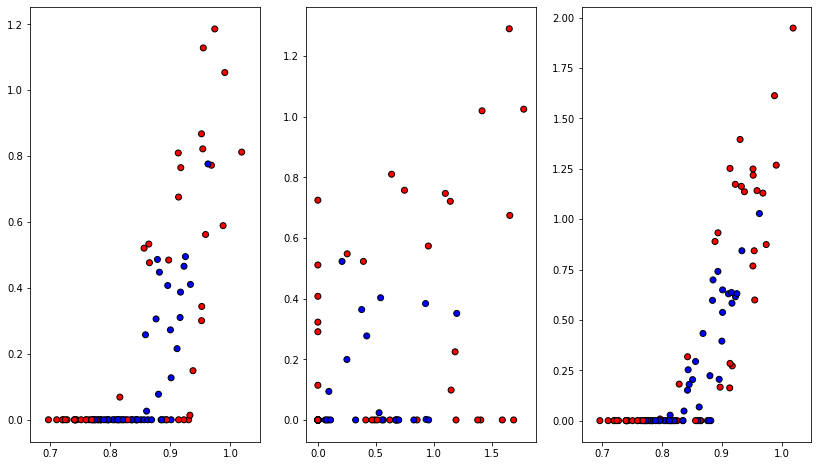

In [18]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(features[0][:, 0], features[0][:, 1], features[0][:,2], cmap=cm_bright,edgecolors='k')
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(131)
ax1.scatter(features[0][:,0], features[0][:,1], c=y_test, cmap=cm_bright, edgecolors='k')
ax2 = fig.add_subplot(132)
ax2.scatter(features[0][:,2], features[0][:,3], c=y_test, cmap=cm_bright, edgecolors='k')
ax3 = fig.add_subplot(133)
ax3.scatter(features[0][:,0], features[0][:,5], c=y_test, cmap=cm_bright, edgecolors='k')

Visualise the linear layer to see how the data have been transformed for classification

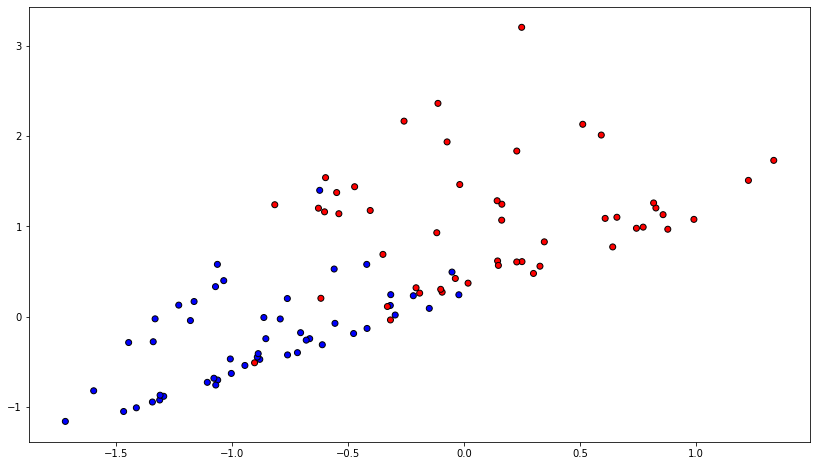

In [19]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax.scatter(features[1][:, 0], features[1][:, 1], c=y_test, cmap=cm_bright,edgecolors='k')

We can see the data have been transformed such that they are easily separable for binary classification

In [20]:
# Do some interpolation for smooth plot transitions
from scipy.interpolate import CubicSpline
import numpy as np

In [40]:

x_ = np.vstack((X_test[:,0], features[0].numpy()[:,0], features[1].numpy()[:,0]))
print(x_.shape)
# for i in range(len(X_test)):
#     print(X_test[i,0], features[0].numpy()[i,0], features[1].numpy()[i,0])
#     x_ = np.concatenate(X_test[i,0], features[0].numpy()[i,0], features[1].numpy()[i,0])
#     print(x_)

(3, 100)
